#### DATA CLEANING AND PREPROCCESSING SECTION

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# loading CSV file
df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [47]:
# checking for missing values and printing out the percentages

missing = df.isnull().sum()
percentage_missing =round((missing/len(df)) * 100,2)
data_dict = {"missing_values_counts":missing,
             "missing values percentage":percentage_missing}

missing_df = pd.DataFrame(data_dict)
missing_df                   

,missing_values_counts,missing values percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [5]:
#Drop any rows where the target variable (selling price) is missing
df['selling_price'].isnull().sum()
df.dropna(subset = ["selling_price"], inplace= True)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [48]:
#filling missing values using the mean
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

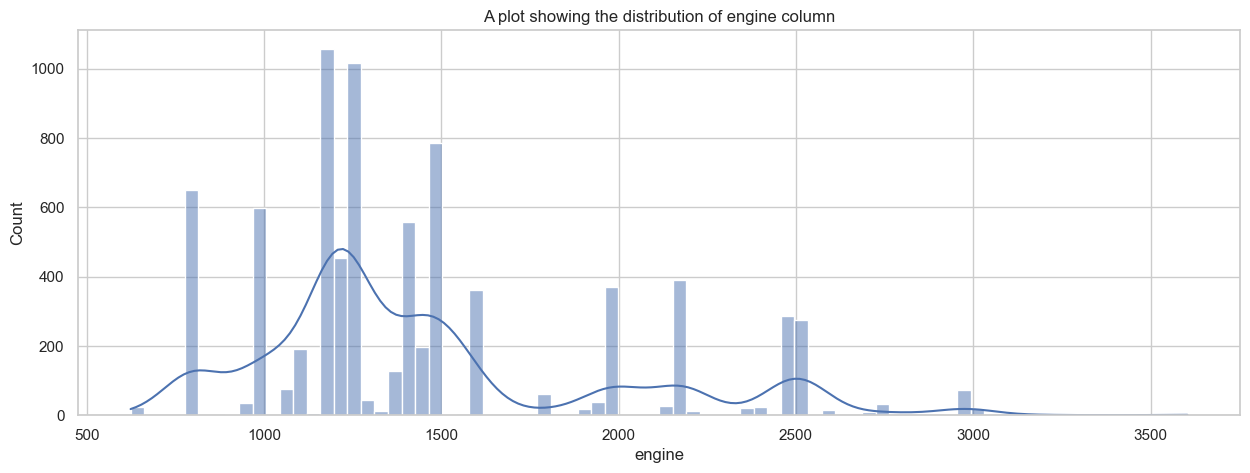

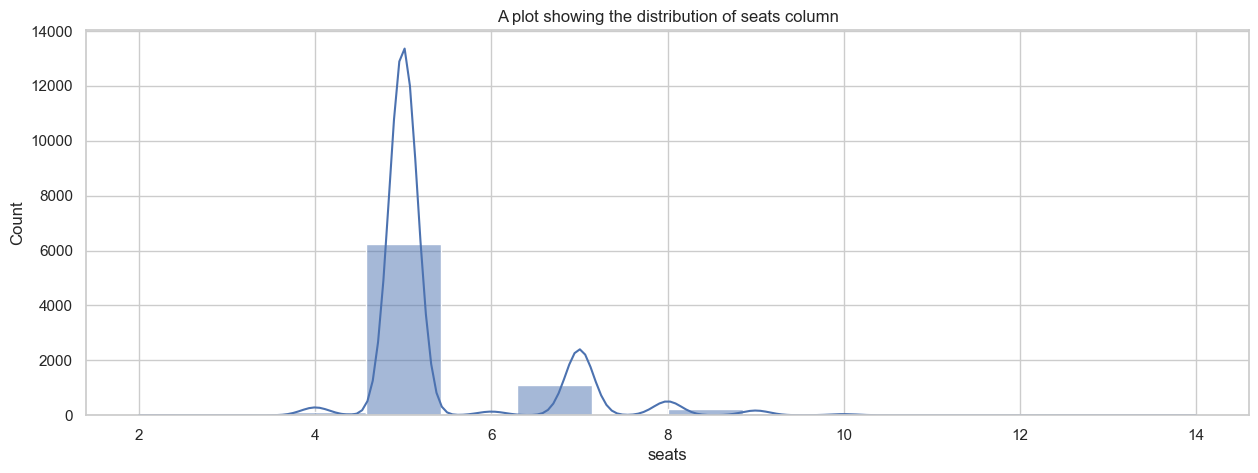

In [50]:
# visualizing engine & seats

Missing_columns =["engine","seats"]
for col in Missing_columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)

In [51]:
#filling missing values with median

for col in Missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)
df.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [52]:
med = df["max_power"].mode()
print(med)

0    74
Name: max_power, dtype: object


In [53]:
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [54]:
#remove duplicate rows in the dataset

df = df.drop_duplicates()
df.shape

(6926, 12)

In [55]:
#Convert the “year” column into the car’s age
df['car_age'] = (2025- df['year'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [56]:
#Check the unique values in the “fuel type” column
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [57]:
#Replace inconsistent values in the “transmission” column

df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [58]:
df['transmission']=df['transmission'].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


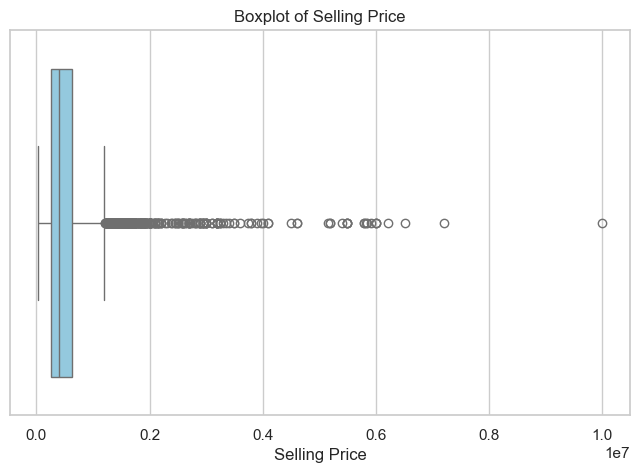

In [62]:
#Check if there are any outliers in the “selling price” column using a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a boxplot for selling price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['selling_price'], color="skyblue")
plt.title("Boxplot of Selling Price")
plt.xlabel("Selling Price")
plt.show()


In [63]:
#Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers)

df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
df.shape

(6906, 13)

In [19]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces.
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'mileage(km/ltr/kg)'', 'car_age'],
      dtype='object')

In [64]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df['price_per_kilometer'] = df['selling_price'] / df['mileage(km/ltr/kg)']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18,8074.534161


In [65]:
#Ensure the dataset index is properly reset after cleaning
df = df.reset_index(drop=True)

In [66]:
#Save your cleaned dataset as a new CSV file called clean_cars.csv
df.to_csv("clean_cars.csv", index=False)

#### EXPLORATORY DATA ANALYSIS

In [67]:
#Find the average selling price of cars in the dataset
average_price = df['selling_price'].mean()
print(average_price)

501378.18114682887


In [68]:
# Find the most common fuel type in the dataset.
most_common_fuel = df['fuel'].mode()[0]
print(most_common_fuel)

Diesel


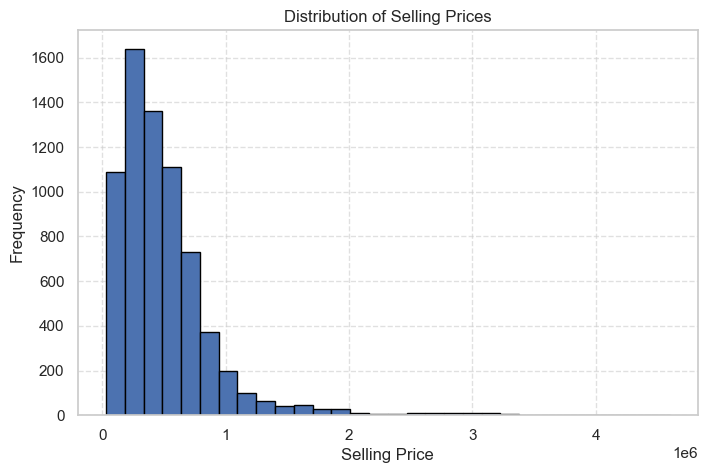

In [70]:
#Plot a histogram of the selling prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


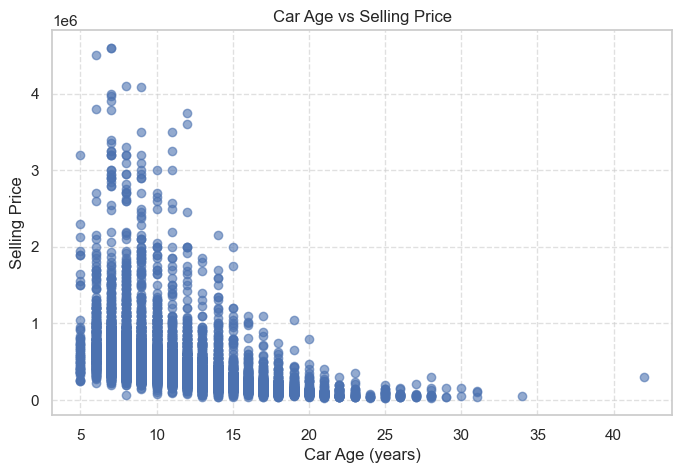

In [71]:
#Plot the relationship between car age and selling price using a scatter plot

plt.figure(figsize=(8, 5))
plt.scatter(df['car_age'], df['selling_price'], alpha=0.6)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [72]:
# Group cars by fuel type and find the average selling price for each group

avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean()
print(avg_price_by_fuel)


fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64


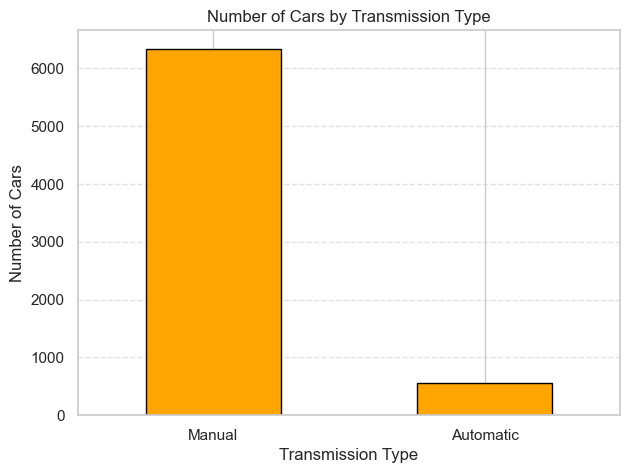

In [73]:
#Plot a bar chart showing the number of cars per transmission type

transmission_counts = df['transmission'].value_counts()

plt.figure(figsize=(7,5))
transmission_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [74]:
#Find the car with the highest mileage in the dataset

highest_mileage_car = df.loc[df['mileage(km/ltr/kg)'].idxmax()]
print(highest_mileage_car)


name                   Maruti Alto 800 CNG LXI Optional
year                                               2019
selling_price                                    330000
km_driven                                         10000
fuel                                                CNG
seller_type                                  Individual
transmission                                     Manual
owner                                      Second Owner
mileage(km/ltr/kg)                                33.44
engine                                            796.0
max_power                                          40.3
seats                                               4.0
car_age                                               6
price_per_kilometer                         9868.421053
Name: 35, dtype: object


In [75]:
#Calculate the correlation between mileage and selling price.

correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print (correlation)

-0.12069849273188767


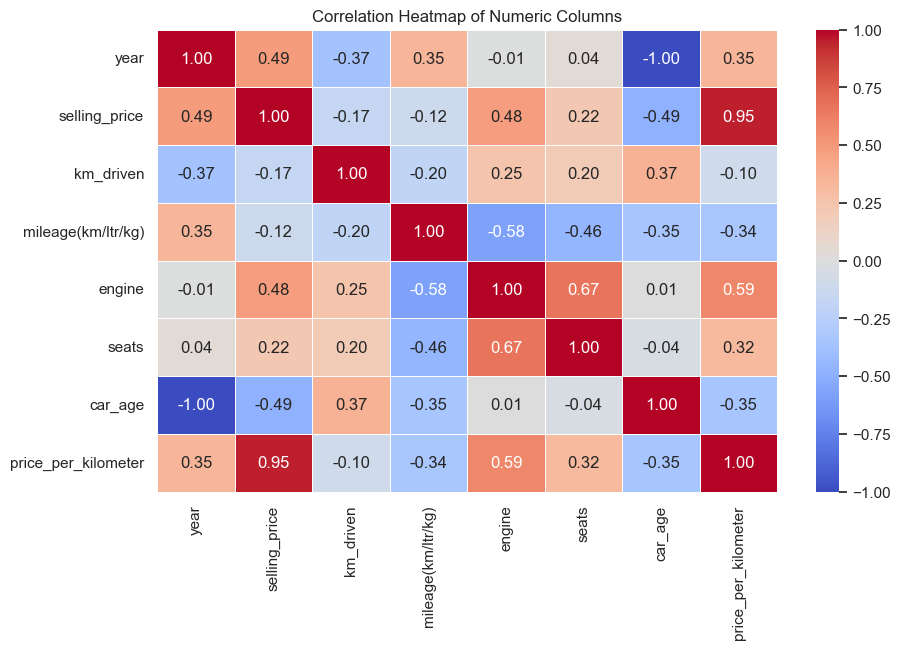

In [78]:
#Plot a heatmap showing the correlations between all numeric columns

corr_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [79]:
#Check if manual cars are generally cheaper or more expensive than automatic cars

avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()
print(avg_price_by_transmission)


transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


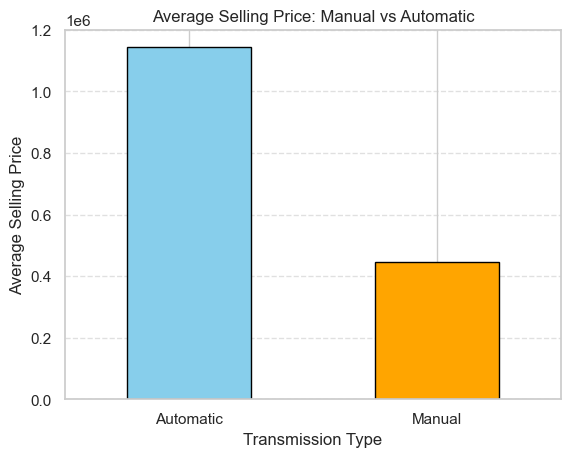

In [80]:

avg_price_by_transmission.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Average Selling Price: Manual vs Automatic')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [82]:
#Find the average selling price for each year of manufacture
avg_price_by_year = df.groupby('year')['selling_price'].mean()
print(avg_price_by_year)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64


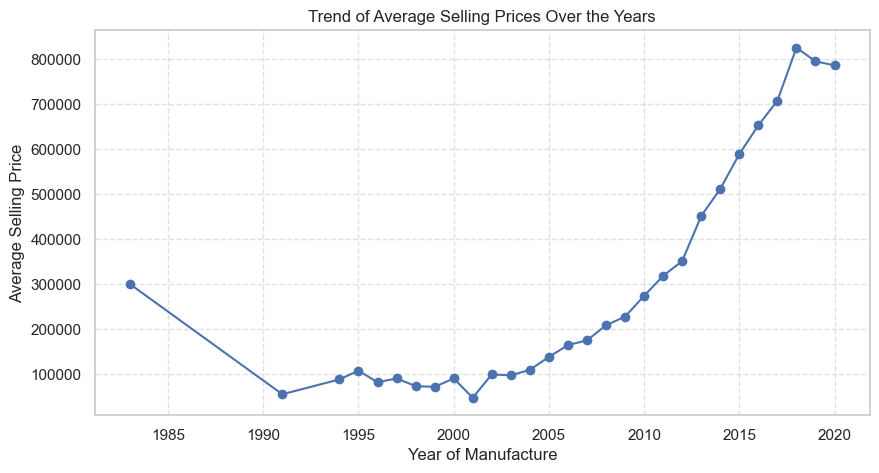

In [83]:
#Plot a line chart showing the trend of selling prices over the years

avg_price_by_year = df.groupby('year')['selling_price'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-')

plt.title('Trend of Average Selling Prices Over the Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [87]:
# Find the most expensive car for each fuel type
most_expensive_per_fuel = df.loc[df.groupby('fuel')['selling_price'].idxmax()]

print(most_expensive_per_fuel)


                                          name  year  selling_price  \
4961     Maruti Ertiga VXI CNG Limited Edition  2014         545000   
283   Mercedes-Benz GL-Class 220d 4MATIC Sport  2018        4600000   
2783               Hyundai i10 Sportz 1.1L LPG  2015         375000   
133            Jeep Wrangler 2016-2019 3.6 4X4  2017        4100000   

      km_driven    fuel seller_type transmission        owner  \
4961      35000     CNG  Individual       Manual  First Owner   
283        7976  Diesel  Individual    Automatic  First Owner   
2783      60000     LPG  Individual       Manual  First Owner   
133       17000  Petrol  Individual    Automatic  First Owner   

      mileage(km/ltr/kg)  engine max_power  seats  car_age  \
4961                22.8  1373.0      80.9    7.0       11   
283                 17.9  2143.0       170    5.0        7   
2783                19.2  1086.0     68.05    5.0       10   
133                  9.5  3604.0       280    5.0        8   

      p

In [89]:
#Find out which brand appears most frequently in the dataset
df['brand'] = df['name'].str.split().str[0]
most_common_brand = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()

print(most_common_brand)
print(count)


Maruti
2165


In [92]:
#Check the top 5 most common combinations of fuel type and transmission.
common_combos = df.groupby(['fuel', 'transmission']).size().reset_index(name='count')
top5_combos = common_combos.sort_values('count', ascending=False).head(5)

print(top5_combos)

     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


#### MACHINE LEARNING